# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter
from scipy.stats import shapiro 

dfMerge16 = pd.read_csv("CleanData/Merge-400runsClean-PC16.csv")


dfRead16 = pd.read_csv("CleanData/ReadCSVClean-PC16.csv")

dfMerge16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,8.543701,7.319702,0.505432,1004.640,64.0,best,25000
1,8.301086,7.139343,0.478271,970.802,63.0,best,25000
2,8.312134,7.124695,0.483093,998.576,63.0,best,25000
3,8.493774,7.304321,0.501648,987.148,62.0,best,25000
4,8.501953,7.313782,0.501038,970.400,61.0,best,25000


In [2]:
def calcMean(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfMergeMean16 = mean_of_dataset(dfMerge16)



dfMergeMean16.head()



C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\669981107.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\669981107.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\669981107.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\669981107.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Selec

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,8.592697,7.383461,0.511481,995.585704,61.555556,25000.0,best
1,13.62662,11.614907,0.863065,1637.276818,63.545455,50000.0,best
2,18.447928,15.657569,1.226042,2220.298214,63.25,75000.0,best
3,23.298185,19.694017,1.607389,2824.994,63.233333,100000.0,best
4,43.489372,36.497636,3.252826,5300.367667,64.233333,200000.0,best


In [3]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = mean_of_dataset_readCSV(dfRead16)

dfReadMean16.head()


C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\669981107.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\669981107.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\669981107.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\669981107.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Selec

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.149151,1.873956,0.12836,231.807079,53.973684,25000.0,random1
1,2.519434,2.185134,0.150334,264.781167,57.0,50000.0,random1
2,3.059938,2.668515,0.178193,304.554189,61.0,75000.0,random1
3,3.524851,3.07726,0.205626,343.570833,63.527778,100000.0,random1
4,4.166064,3.626851,0.233299,420.754475,65.425,200000.0,random1


In [4]:
dfMergeMean16 = dfMergeMean16.reset_index(drop=True)
dfReadMean16 = dfReadMean16.reset_index(drop=True)

dfMergeMean16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,8.592697,7.383461,0.511481,995.585704,61.555556,25000.0,best
1,13.62662,11.614907,0.863065,1637.276818,63.545455,50000.0,best
2,18.447928,15.657569,1.226042,2220.298214,63.25,75000.0,best
3,23.298185,19.694017,1.607389,2824.994,63.233333,100000.0,best
4,43.489372,36.497636,3.252826,5300.367667,64.233333,200000.0,best


In [5]:
def deductReadFromAlg(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "sorted"
        if case == "worst":
            case2 = "mergeworst"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append((Cc-Rc)/400)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append((Ct-Rt)/400)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lm.append((Cm-Rm)/400)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


deductReadFromAlg(dfMergeMean16,dfReadMean16)



C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\4210063106.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\4210063106.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\4210063106.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\4210063106.py:21: Us

# Shapiro Wilks Test

In [28]:
dfMergeSortBest16 = dfMerge16[dfMerge16["Input case"].str.startswith("best")]
dfMergeSortWorst16 = dfMerge16[dfMerge16["Input case"].str.startswith("worst")]
dfMergeSortRandom16 = dfMerge16[dfMerge16["Input case"].str.startswith("random")]

print(dfMergeSortBest16)


        PKG (J)     CPU (J)   DRAM (J)  Time (ms)  Temp (C) Input case  \
0      8.543701    7.319702   0.505432   1004.640      64.0       best   
1      8.301086    7.139343   0.478271    970.802      63.0       best   
2      8.312134    7.124695   0.483093    998.576      63.0       best   
3      8.493774    7.304321   0.501648    987.148      62.0       best   
4      8.501953    7.313782   0.501038    970.400      61.0       best   
..          ...         ...        ...        ...       ...        ...   
350  208.115845  173.067139  17.653809  25709.300      68.0       best   
351  208.410522  173.338318  17.647339  25749.400      63.0       best   
352  209.105225  173.813110  17.710938  25916.000      66.0       best   
353  209.274597  173.898132  17.735718  25978.500      63.0       best   
354  209.021057  173.924011  17.659912  25746.500      66.0       best   

        Size  
0      25000  
1      25000  
2      25000  
3      25000  
4      25000  
..       ...  
350  1

In [33]:
data = []
size = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeMean16[dfMergeMean16["Size"]==i]["CPU (J)"]).pvalue:
        data.append(1)
    else:
        data.append(0)
    size.append(i)
    print(shapiro(dfMergeMean16[dfMergeMean16["Size"]==i]["CPU (J)"]).pvalue)
print(data)

6.542375194840133e-05
2.744869198068045e-05
2.7803325792774558e-05
4.6690471208421513e-05
2.5927140086423606e-05
1.9117273041047156e-05
2.9247497877804562e-05
2.4416132873739116e-05
2.5752993678906932e-05
2.5803348762565292e-05
2.1024012312409468e-05
2.3602915462106466e-05
2.6871330192079768e-05
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [29]:
dataBest = []
sizeBest = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortBest16[dfMergeSortBest16["Size"]==i]["CPU (J)"]).pvalue:
        dataBest.append(1)
    else:
        dataBest.append(0)
    sizeBest.append(i)
    print(shapiro(dfMergeSortBest16[dfMergeSortBest16["Size"]==i]["CPU (J)"]).pvalue)
print(dataBest)

0.02785378135740757
0.37734511494636536
0.31002703309059143
0.5057284235954285
0.3550143837928772
0.04635678976774216
0.01720878668129444
0.2842574119567871
0.9258242249488831
0.31387439370155334
0.29811179637908936
0.21487733721733093
0.22961005568504333
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]


In [31]:
data2 = []
size2 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortWorst16[dfMergeSortWorst16["Size"]==i]["CPU (J)"]).pvalue:
        data2.append(1)
    else:
        data2.append(0)
    size2.append(i)
    print(shapiro(dfMergeSortWorst16[dfMergeSortWorst16["Size"]==i]["CPU (J)"]).pvalue)
print(data2)

0.8175855278968811
0.007321210112422705
0.4363153576850891
0.5252704620361328
0.5608171224594116
0.15775196254253387
0.0717424526810646
0.0028398961294442415
0.24292722344398499
0.17437390983104706
0.2417290359735489
0.3899289071559906
0.7804434895515442
[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [32]:
data3 = []
size3 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
    if 0.05 < shapiro(dfMergeSortRandom16[dfMergeSortRandom16["Size"]==i]["CPU (J)"]).pvalue:
        data3.append(1)
    else:
        data3.append(0)
    size3.append(i)
    print(shapiro(dfMergeSortRandom16[dfMergeSortRandom16["Size"]==i]["CPU (J)"]).pvalue)
print(data3)
#make for each random 

0.009733953513205051
0.09020524471998215
0.34720075130462646
0.00017675642448011786
0.0006491741514764726
6.315370004728038e-09
9.737384971231222e-05
0.00047675444511696696
0.0002999633434228599
2.2558444356945984e-07
0.00016431938274763525
5.324872631717881e-07
4.936162554258772e-07
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# PLOTS

In [7]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10)
        if r2 > 0.5 and regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [8]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [9]:
import math
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    nlogn = []
    for case in ["best", "worst", "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    nlogn.append(df["Size"][getIndex(df,case+str(i),size)] * math.log2(df["Size"][getIndex(df,case+str(i),size)]))

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["nlog(n)"] = nlogn
calcPercent(dfMergeMean16)


dfMergeMean16.head()

C:\Users\Kristina\AppData\Local\Temp\ipykernel_40000\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n)
0,8.592697,7.383461,0.511481,995.585704,61.555556,25000.0,best,0.014246,1.970851,0.000994,85.927173,100,0.015240,3.652410e+05
1,13.62662,11.614907,0.863065,1637.276818,63.545455,50000.0,best,0.023702,3.477878,0.001802,85.236888,100,0.025504,7.804820e+05
2,18.447928,15.657569,1.226042,2220.298214,63.25,75000.0,best,0.032756,4.839167,0.002638,84.874402,100,0.035394,1.214595e+06
3,23.298185,19.694017,1.607389,2824.994,63.233333,100000.0,best,0.042071,6.276871,0.003547,84.530260,100,0.045618,1.660964e+06
4,43.489372,36.497636,3.252826,5300.367667,64.233333,200000.0,best,0.082144,12.257489,0.007564,83.923116,100,0.089708,3.521928e+06


-2.1256834985006208 [0.        0.0001884]
-2.7214322809959697 [0.         0.00019059]
-2.0185597506818027 [0.         0.00018727]
-2.34190335265437 [0.         0.00018969]
-2.6727209214598417 [0.        0.0001911]
-2.011303408989235 [0.         0.00018948]
-2.105216456533583 [0.         0.00018862]
-2.372608496033081 [0.         0.00019048]
-1.7931924778208383 [0.         0.00018809]
-2.185564935567797 [0.         0.00018956]
random0 R2 0.9996824524061545  

random1 R2 0.9991545067680948  

random2 R2 0.9996350811943432  

random3 R2 0.9994911726131899  

random4 R2 0.9988192919247211  

random5 R2 0.9997806517713391  

random6 R2 0.9997224183471707  

random7 R2 0.99961840704448  

random8 R2 0.9997548144635456  

random9 R2 0.9996240391542351  

0.25823059267815296 [0.00000000e+00 8.57485026e-05]
0.04993981265281633 [0.00000000e+00 6.17349585e-05]


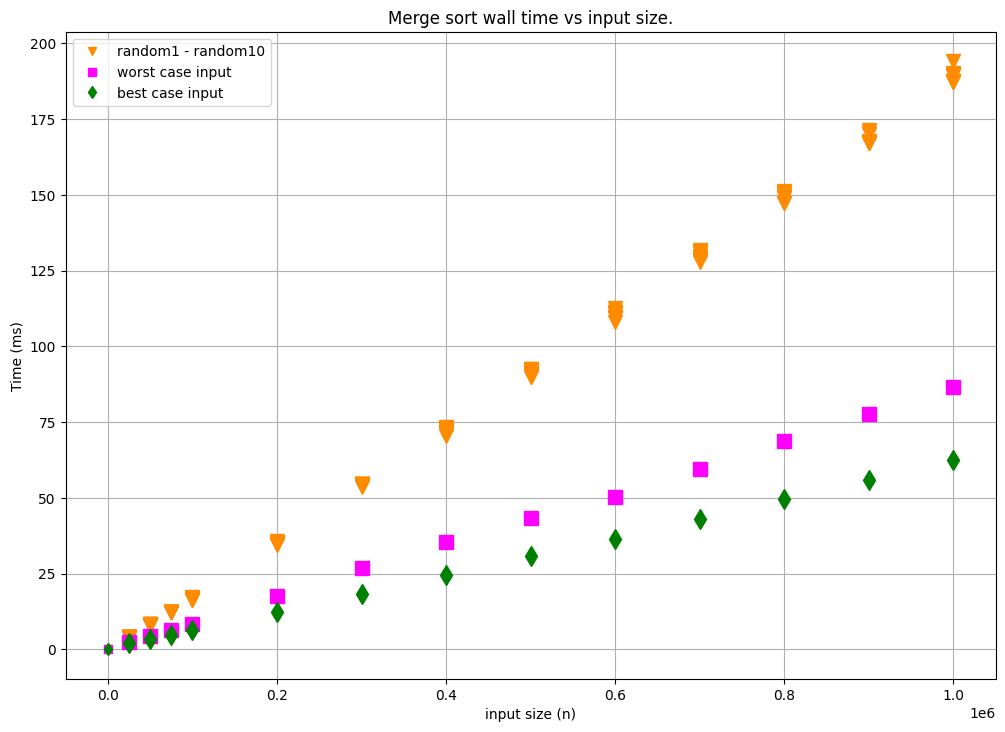

In [10]:
plt.figure(figsize=(10*1.2,7*1.2))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(0,0,"d", color="green",label="best case input")
# print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Merge sort wall time vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()


# Time v big-o

1.4576259897765027 [0.00000000e+00 9.38629715e-06]
0.8769830651262396 [0.00000000e+00 9.49875609e-06]
1.5354539045445676 [0.00000000e+00 9.33096627e-06]
1.2532313406241968 [0.00000000e+00 9.45235561e-06]
0.9382954590810755 [0.00000000e+00 9.52367881e-06]
1.5935287854549074 [0.00000000e+00 9.44011615e-06]
1.4813483016718578 [0.00000000e+00 9.39779057e-06]
1.2399206411219978 [0.00000000e+00 9.49116201e-06]
1.787997175963298 [0.00000000e+00 9.37056726e-06]
1.417254497032232 [0.0000000e+00 9.4445568e-06]
random0 R2 0.999638783050605  

random1 R2 0.9997822421830674  

random2 R2 0.9997921730000388  

random3 R2 0.9997722682415568  

random4 R2 0.9993707756774823  

random5 R2 0.9997132619376393  

random6 R2 0.9997063664615938  

random7 R2 0.9998358932232683  

random8 R2 0.9996161170640948  

random9 R2 0.9996466495040939  

1.8988695672840024 [0.00000000e+00 4.27100148e-06]
1.221635966357809 [0.0000000e+00 3.0760611e-06]
worst R2  0.9989226116934481 

best R2  0.9998685573198899 



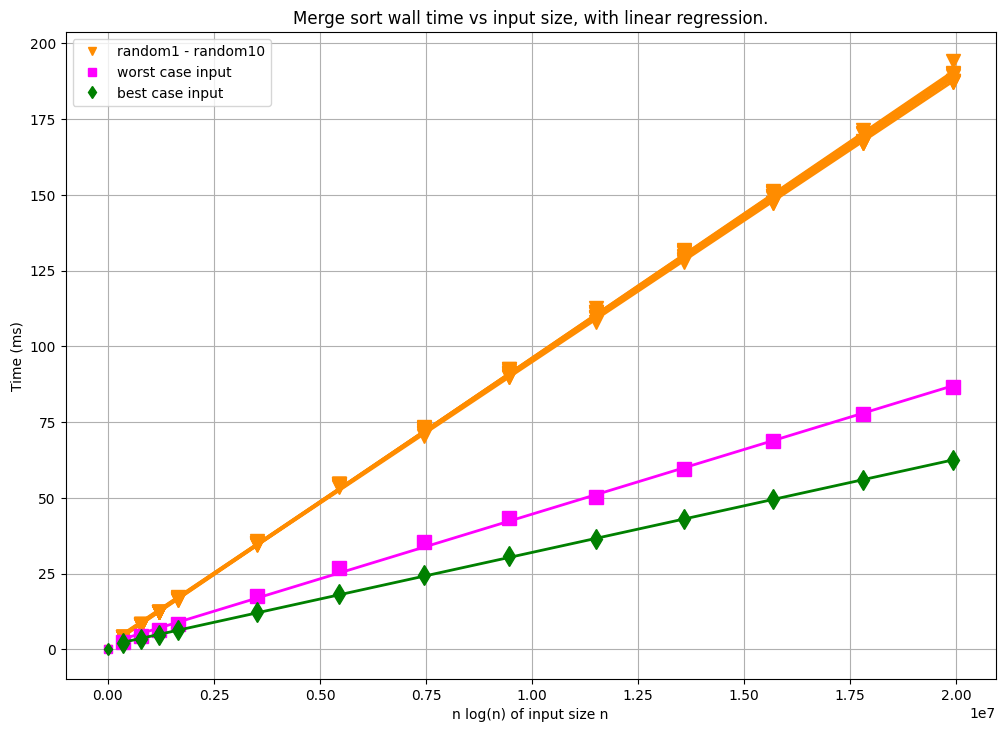

In [11]:
plt.figure(figsize=(10*1.2,7*1.2))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=True)
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d",regLine=True)
plt.plot(0,0,"d", color="green",label="best case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort wall time vs input size, with linear regression.")
plt.xlabel("n log(n) of input size n")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()


# EC v Time

0.0001277969376041188 [0.         0.00664063]
-0.00020426659579053652 [0.         0.00664228]
-0.0012889952622697765 [0.         0.00667521]
-2.0610446942903593e-05 [0.         0.00664701]
-0.0003506573877021246 [0.         0.00664439]
-0.0005488147082772787 [0.        0.0066515]
-0.0008851946879914196 [0.         0.00666586]
-0.00028944811337905385 [0.        0.0066386]
-0.000643926983890375 [0.         0.00665319]
9.419911780161883e-06 [0.        0.0066325]
random0 R2 0.9999702470557561  

random1 R2 0.9999860110213735  

random2 R2 0.9999675496219377  

random3 R2 0.9999724599947918  

random4 R2 0.9999567669323067  

random5 R2 0.9999764418340047  

random6 R2 0.9999634674471619  

random7 R2 0.9999822371068179  

random8 R2 0.9999530845181243  

random9 R2 0.9999738200187925  

-0.002712860192803146 [0.         0.00746632]
worst R2  0.9998584482160954 

-0.0007218841111539254 [0.        0.0073961]
best R2  0.9999487622040144 



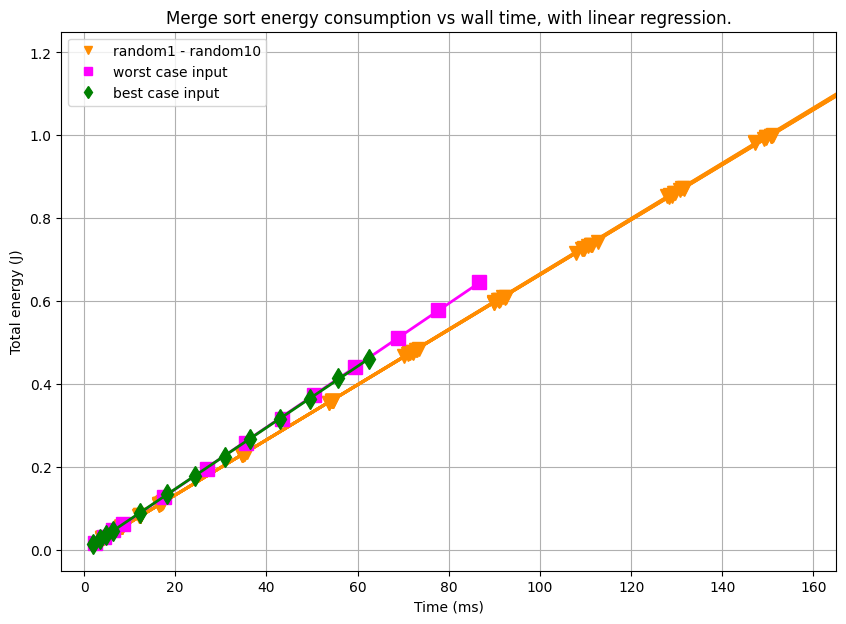

In [12]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
plt.plot(-100,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-100,0,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-100,0,"d", color="green",label="best case input")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.xlim(-5, 165)
plt.ylim(-0.05, 1.25)
plt.legend()
plt.grid()
plt.show()


-0.002712860192803146 [0.         0.00746632]
worst R2  0.9998584482160954 

-0.0007218841111539254 [0.        0.0073961]
best R2  0.9999487622040144 



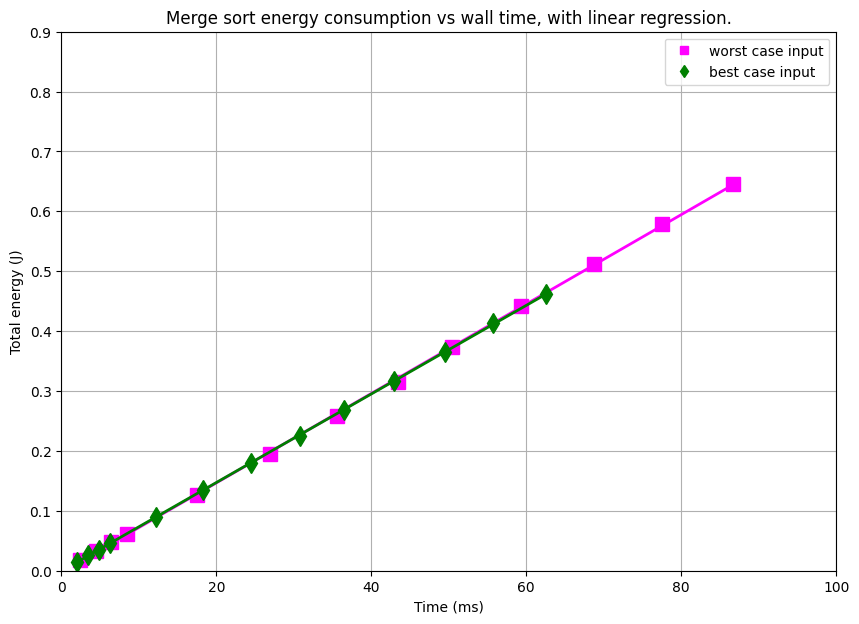

In [13]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
# plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-100,0,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-100,0,"d", color="green",label="best case input")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.xlim(0, 100)
plt.ylim(0, 0.9)
plt.legend()
plt.grid()
plt.show()


# EC v big-oh

-0.013993413152183276 [0.0000000e+00 1.2510836e-06]
-0.018274637669291605 [0.00000000e+00 1.26593525e-06]
-0.014728916316847585 [0.00000000e+00 1.24996779e-06]
-0.01559089157082405 [0.00000000e+00 1.26089054e-06]
-0.01811205971181573 [0.00000000e+00 1.26973032e-06]
-0.013905845369834413 [0.00000000e+00 1.26027117e-06]
-0.014907191221920302 [0.00000000e+00 1.25732018e-06]
-0.016017672659521587 [0.00000000e+00 1.26444471e-06]
-0.012568053141288171 [0.0000000e+00 1.2513828e-06]
-0.01446913656043991 [0.00000000e+00 1.25721375e-06]
random0 R2 0.9996723309262097  

random1 R2 0.9991182629381911  

random2 R2 0.9994761289726742  

random3 R2 0.9994768644689332  

random4 R2 0.9987862274423733  

random5 R2 0.9996798705322765  

random6 R2 0.9996453348003616  

random7 R2 0.9995185449044941  

random8 R2 0.9996846437158603  

random9 R2 0.999534961468199  

-0.0008215844272569384 [0.00000000e+00 6.40309978e-07]
-0.00033970682949310826 [0.00000000e+00 4.56568693e-07]
worst R2  0.999632796240645

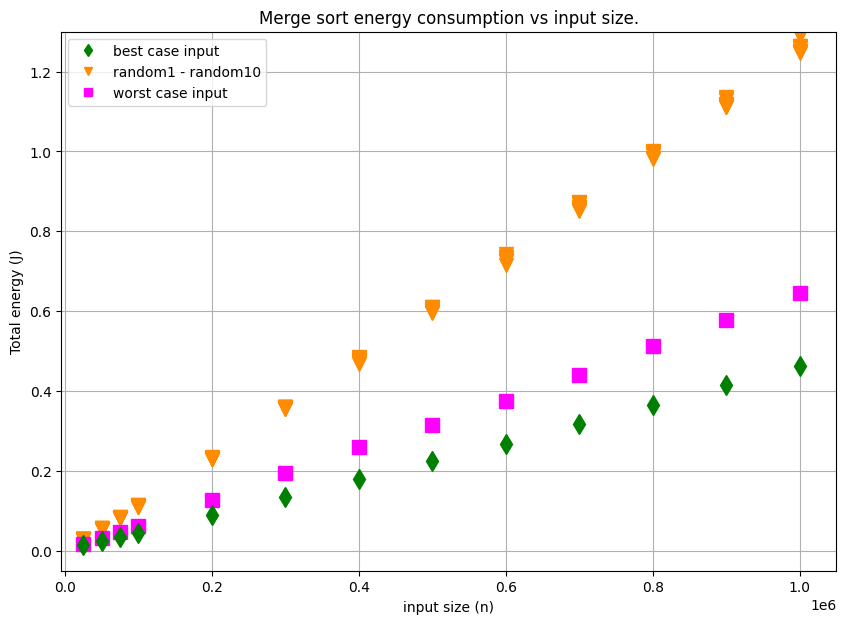

In [14]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(-10000,-10000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(-10000,-10000,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-10000,-10000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort energy consumption vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(-5000,1050000)
plt.ylim(-0.05,1.3)
plt.legend()
plt.show()

0.00975988036506914 [0.00000000e+00 6.23365996e-08]
0.0056070381889878895 [0.00000000e+00 6.30950126e-08]
0.008931582500143143 [0.00000000e+00 6.22895879e-08]
0.008274187978493552 [0.00000000e+00 6.28341614e-08]
0.005834065023914814 [0.00000000e+00 6.32850174e-08]
0.010020655688260605 [0.0000000e+00 6.2794528e-08]
0.008938143307566704 [0.00000000e+00 6.26505054e-08]
0.007918896189470614 [0.00000000e+00 6.30107714e-08]
0.011192816724587384 [0.00000000e+00 6.23512806e-08]
0.009371867429417313 [0.00000000e+00 6.26454791e-08]
random0 R2 0.999791571190728  

random1 R2 0.9998209068410496  

random2 R2 0.9998709281399937  

random3 R2 0.9998799613385828  

random4 R2 0.999515691882726  

random5 R2 0.9998038048726476  

random6 R2 0.9998654652575579  

random7 R2 0.9999056067373483  

random8 R2 0.9997965976322355  

random9 R2 0.9997639142274098  

0.011370264922480444 [0.00000000e+00 3.18999672e-08]
0.008303420893563451 [0.00000000e+00 2.27520721e-08]
worst R2  0.9994905037992499 

best R2

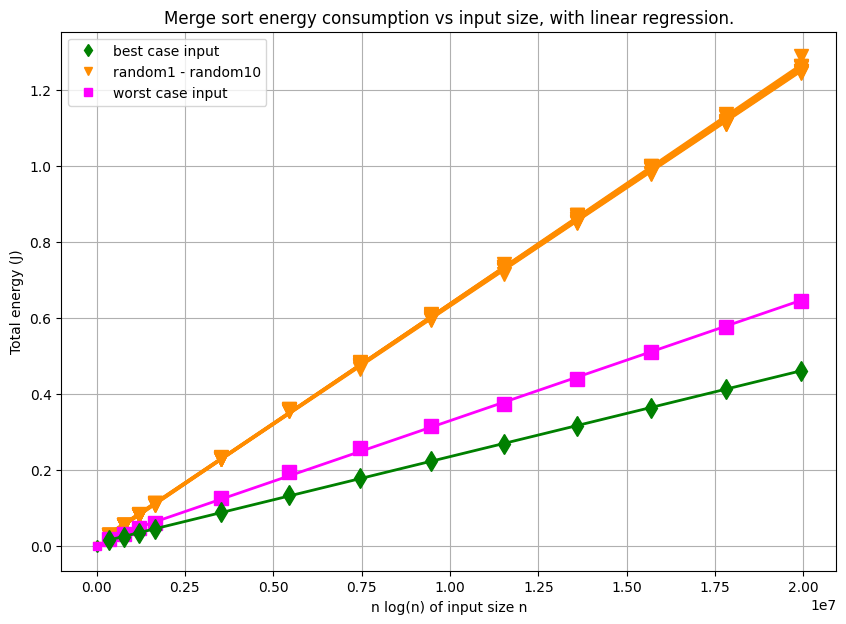

In [15]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(-0000,-0000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(-0000,-0000,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=True)
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=True)
plt.plot(-0000,-0000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort energy consumption vs input size, with linear regression.")
plt.xlabel("n log(n) of input size n")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend()
plt.show()